In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['rbc'])
df.drop('rbc', axis=1, inplace=True)
df['rbc'] = label
label2=le.fit_transform(df['pc'])
df.drop('pc', axis=1, inplace=True)
df['pc'] = label2
label3=le.fit_transform(df['pcc'])
df.drop('pcc', axis=1, inplace=True)
df['pcc'] = label3
label4=le.fit_transform(df['ba'])
df.drop('ba', axis=1, inplace=True)
df['ba'] = label4
label5=le.fit_transform(df['htn'])
df.drop('htn', axis=1, inplace=True)
df['htn'] = label5
label6=le.fit_transform(df['cad'])
df.drop('cad', axis=1, inplace=True)
df['cad'] = label6
label7=le.fit_transform(df['dm'])
df.drop('dm', axis=1, inplace=True)
df['dm'] = label7
label8=le.fit_transform(df['appet'])
df.drop('appet', axis=1, inplace=True)
df['appet'] = label8
label9=le.fit_transform(df['pe'])
df.drop('pe', axis=1, inplace=True)
df['pe'] = label9
label10=le.fit_transform(df['ane'])
df.drop('ane', axis=1, inplace=True)
df['ane'] = label10
label11=le.fit_transform(df['classification'])
df.drop('classification', axis=1, inplace=True)
df['classification'] = label11
df

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc,pcc,ba,htn,cad,dm,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,...,1,0,0,1,1,4,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,...,1,0,0,0,1,3,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,...,1,0,0,0,1,4,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0,1,0,1,1,3,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,...,1,0,0,0,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,1,0,0,0,1,3,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,1,0,0,0,1,3,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,1,0,0,0,1,3,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,1,0,0,0,1,3,0,0,0,2


In [ ]:
df.fillna(value=0, inplace=True)
df

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc,pcc,ba,htn,cad,dm,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,0.0,...,1,0,0,1,1,4,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,0.0,18.0,0.8,0.0,...,1,0,0,0,1,3,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,0.0,...,1,0,0,0,1,4,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0,1,0,1,1,3,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,0.0,...,1,0,0,0,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,1,0,0,0,1,3,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,1,0,0,0,1,3,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,1,0,0,0,1,3,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,1,0,0,0,1,3,0,0,0,2


feature engineering

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('kidney_disease.csv')

# Extract the features from the DataFrame
features = df.iloc[:, 1:].values

# Instantiate the PCA model with the desired number of components
pca = PCA(n_components=2)

# Fit the PCA model to the features
principal_components = pca.fit_transform(features)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components with any other desired columns from the original DataFrame
final_df = pd.concat([df.iloc[:, :1], principal_df], axis=1)

# Save the final DataFrame to a new CSV file
final_df.to_csv('pca_output.csv', index=False)

# Create a scatter plot of the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()


ValueError: ignored

^ Doesn't work 

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0.0,0.0,8.0,17.0
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0.0,0.0,8.0,17.0
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0.0,0.0,8.0,17.0
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0.0,0.0,8.0,17.0
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0.0,0.0,8.0,17.0


In [ ]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [ ]:
df.corr

In [ ]:
x=df['temperature']
y=df['number_people']

ValueError: ignored

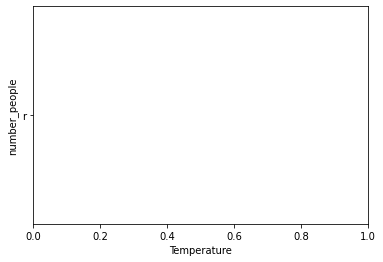

In [ ]:
colors=('r','b')
plt.xlabel('Temperature')
plt.ylabel('number_people')
plt.scatter(x,y=colors)

Is supposed to be a simple coorlation chart of temp and populace, but values are not the same.

Text(0.5, 1.0, 'Correlation between different fearures')

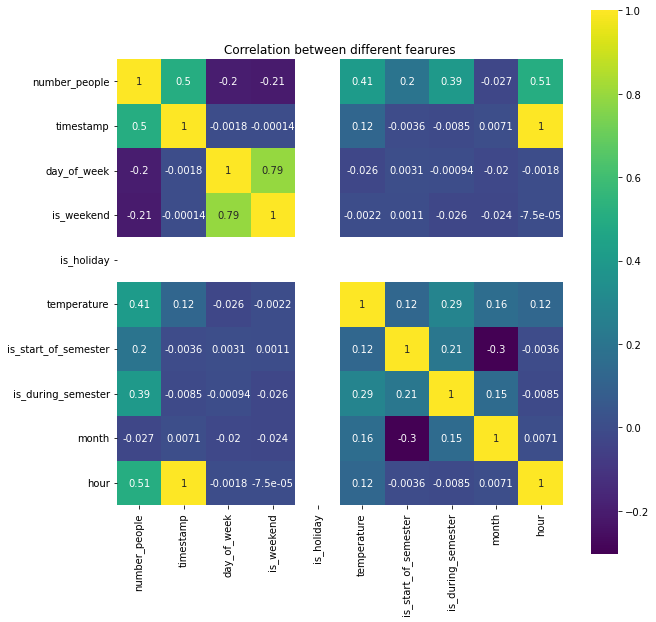

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
x

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

# X.shape should be (N, M) where M >= 1
X = df[['temperature']]  
# y.shape should be (N, 1)
y = df['number_people'] 
# perform label encoding if "label" contains strings
# y = pd.factorize(df['label'])[0].reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.33, random_state=42)

In [ ]:
x=df.iloc[:, 0].values
y=df.iloc[:, 1].values

regressor=LinearRegression()
x=x.reshape(-1,1)
regressor.fit(x,y)

NameError: ignored

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[12.58425227],
       [12.58425227],
       [12.58425227],
       ...,
       [-5.31574773],
       [-5.31574773],
       [-4.17574773]])

In [ ]:
pca.get_covariance()

array([[53.08156935]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([1.])

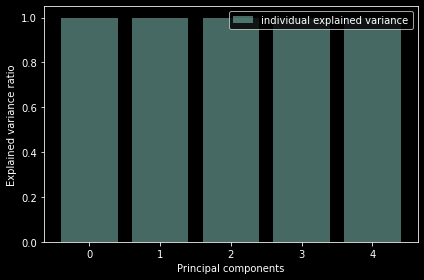

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

I think the data is broken somewhere, maybe

In [ ]:
pca=PCA(n_components=1)
X_new=pca.fit_transform(X)
X_new

array([[12.58425227],
       [12.58425227],
       [12.58425227],
       ...,
       [-5.31574773],
       [-5.31574773],
       [-4.17574773]])

sorry seriously stuck